## 1.	Overview of Bayesian Optimization

Bayesian optimization is an approach to optimize the objective function that usually takes a long time (minutes or hours) to evaluate like tuning hyperparameters of a deep neural network. Also, many optimization problems in machine learning are black-box optimization problems where the objective function is unknown (black-box function) or we have no information about its derivatives. Thanks to Bayes theorem, such problems can be handled by developing a Bayesian optimization algorithm. There are many areas where Bayesian optimization (BO) can be a handy tool. To make an example BO has been widely used to design engineering systems (system identification) and choose laboratory experiments in materials (model selection). But this is not the only place that BO can be helpful. In the computer science they are widely used in A/B testing, recommender system, robotics and reinforcement learning, environmental monitoring and sensor networks, preference learning and interactive interfaces, and tuning the hyperparameters in deep neural networks. As can be seen, BO is a class of machine-learning-based optimization algorithm that focuses on solving problems by inferring the data. But as an engineer we should know where the best place is to use BO for our problems.

### 1.1.	 Let’s Answer the Big Question: When We Need the Bayesian Optimization?

*	The BO algorithm works well on the problem where the input dimension is not too large. It is recommended that to use this algorithm for problems with dimensions less than 20.

*	The objective function is continuous. We will see later that this is an assumption for implementation of Gaussian process (GP).

*	Cost matters! The function that we need to optimize is expensive to evaluate. For instance, it requires lots of iterations while our system is limited in performance (computationally cost). On the other hand, the implementation requires purchasing cloud computing environments while our budget is limited (budget limitation).

*	The objective function has one of the following problems: 1) function is unknown (black box), 2) the derivatives unknown or difficult to calculate, and 3) the function is non-convex.

*	We are looking for the global optimum not the local one.


### 1.2.	 Time for Building the BO, Parametric vs. Nonparametric

Bayesian Optimization is an approach that uses Bayes Theorem to direct the search in order to find the minimum or maximum of an objective function. The most efficacy of the Bayesian optimization is in the black box system in which the parameter of the model is unknown (nonparametric Bayesian optimization (NBO)). But imagine that I have a beam which its characteristics are defined by stiffness, elasticity and the applied load (more simplistic imagine we have a model with a, b, and c variables). Further the goal is to find these variables in a way that the beam deflection is minimum. If we consider our model uncertain, this is another place that BO comes to help. In other words, due to the uncertainty that exists in our model, we infer our model to find the variables that describe our model well. This case is defined as the parametric Bayesian optimization (PBO). 

#### 1.2.1.	Parametric Bayesian Optimization (PBO)

In order to define the Bayesian optimization with parametric models, we consider a generic family of models parametrized by w. Imagine we have a set of data $(D)$. Since w is an unobserved quantity, we consider it as a latent random variable which has a prior distribution named $p(w)$. Given a data D and defining the likelihood model as $p(D|w)$, we can then infer a posterior distribution $p(w|D)$ using the Bayes theorem.

$$p(w│D)=\frac{(p(D│w)p(w))}{(p(D))}	\quad \quad(1)$$

The posterior represents the updated beliefs about the model parameters after observing the data $(D)$. The denominator is correspondent to the marginal of likelihood (evidence in literatures) which is usually difficult to evaluate. This problem is considered as a fully Bayesian approach. 

#### 1.2.2.	Nonparametric Bayesian Optimization (NBO)

The NBO is rooted in two components: 1) Bayesian statistical model for modeling the objective function (surrogate) and 2) an acquisition function for deciding where to sample next. The mathematics here is going to be a little bit complex. We will use space-filling experimental design to evaluate the objective function. Then we will perform the iterative calculations to allocate the remainder of a budget of N functions evaluations. Here, the surrogate model is defined as a Gaussian process (GP) which provides the Bayesian posterior probability distribution that describes the potential value for $f(x)$ at the determined point x. Following this, the acquisition function measures the x value at the next step to based on the current posterior evaluation.

## 2.	Nonparametric Bayesian Optimization

In this part, we will see how we can generalize the concept of PBO to NBO in order to optimize our favorite black box. This can be done by marginalizing away the weights in Bayesian linear regression and applying the kernel trick to construct a Bayesian nonparametric regression model. By kernelizing a marginalized version of Bayesian linear regression what we have already done is construct an object called a Gaussian process (GP) which we will discuss in the next part.

### 2.1. Gaussian Process



Gaussian process is a nonparametric model that is characterized by its prior mean function ($μ_0$) and its positive definite kernel (covariance) function ($Σ_0$) over the function space. The interesting thing about the  $Σ_0$ is that it is constructed at each pair of points $x_i$ and $x_j$. Therefore, if the points x_i and $x_j$ are close to each other in the input space, they would have the larger positive correlation which put emphasis on the belief that they have more similar function values.
The prior distribution over the functions $[f(x_1 ),f(x_2 ),…,f(x_n )]$ is defined as:

$$f≈\mathcal{N}\left(\left[\begin{matrix}\mu(x_1)\\\vdots\\\mu\left(x_n\right)\\\end{matrix}\right],\ \left[\begin{matrix}\Sigma_0(x_1,x_1)&\ldots&\Sigma_0(x_1,x_n)\\\vdots&\ddots&\vdots\\\Sigma_0(x_n,x_1)&\ldots&\Sigma_0(x_n,x_n)\\\end{matrix}\right]\right)≈GP\left(\underset{{Mean}}{{\underbrace{\mu\left(x_{1:n}\right)}}}\ ,\underset{Kernel}{\underbrace{\Sigma_0(x_{1:n},x_{1:n})}}\ \right)$$


Let’s go one step further and include some data in the problem. Imagine the observation is defined as $D_n={[(x_i,f(x_i)]}_{i=1}^n$. As defined previously, the random variable $f(x)$ conditioned on observations $D_n$ is also normally distributed when kernelizing linear regression. Such a conditioned function is correspondent to the posterior which has the mean of $μ_n$ and $σ_n^2$ which is defined as follows:

$$μ_n (x)=Σ_0 (x,x_{1:n} ) [[Σ_0(x_{1:n},x_{1:n} )+σ^2 I]]^{-1} (f(x_{1:n} )-μ(x_{1:n} ))+μ(x)  \quad\quad	(1)$$

$$σ_n^2 (x)=Σ_0 (x,x)-Σ_0 (x,x_{1:n} ) [[Σ_0 (x_{1:n},x_{1:n} )+σ^2 I]]^{-1} Σ_0 (x_{1:n},x)  \quad\quad	(1)$$


Where $Σ_0 (x,x_{1:n} )$ is a vector of covariance terms between $x$ and $x_{1:n}$. The posterior mean and variance evaluated at any point x represent the model prediction and uncertainty, respectively, in the objective function at the point $x$. The posterior functions are used to select the next query point $x_{n+1}$.

#### 2.1.1.	The prior mean function

The prior mean function provides a possibles a possible offset. In most cases, this function is set to be a constant ($μ(x)≡μ$). However, when f is believed to have a trend or some application specific parametric structure, we could define the mean function to be:

$$μ(x)=μ+∑_{i=1}^pβ_i ψ_i (x)	\quad \quad(1)$$

Where each $\psi_i(x)$ is a parametric function, and often a low-order polynomial in $x$.

#### 2.1.2.	The Choice of Kernel in Gaussian Process

One of the most important components of BO is the covariance (kernel) function which dictates the structure of the response functions that we can fit. To make an example, if we expect the response function to be periodic, we can use periodic kernels. Kernels usually are defined as the points closer in the input space are more strongly correlated. In addition, kernels should be positive-semi definite. Different types of kernels can be defined as follows:

a)	Laplacian function: this function provides a continuous and non-differentiable kernel function. In this case, if you average over your samples, you will get straight line called Brownian bridges.

$$\Sigma_0=\sigma_f^2\exp{\left(-\frac{1}{2l^2}\left|x_i-x_j\right|\right)} \quad \quad (1)$$

b)	Power exponential or Gaussian kernel:

$$\Sigma_0=\sigma_f^2\exp{\left(-\frac{1}{2l^2}\left|\left|x_i-x_j\right|\right|^2\right)} \quad \quad (1)$$

c)	Rational Quadratic:

$$\Sigma_0=\sigma_f^2\exp{\left(1+\frac{1}{2\alpha l^2}\left|\left|x_i-x_j\right|\right|^{-\alpha}\right)} \quad \quad (1)$$

d)	Periodic function:

$$\Sigma_0=\sigma_f^2\cos{\left(\omega\left(x_i-x_j\right)\right)}\exp{\left(-\frac{1}{2l^2}\left(x_i-x_j\right)^2\right)} \quad \quad (1)$$

e)	Matern kernel:Matern kernels are flexible class of stationary kernels. The main parameter to characterize these kernels is $\nu>0$ which defines the smoothness. The following shows the formulation of famous Matern kernels.

$$\Sigma_{0_Mattern1}=\sigma_f^2\exp{\left(-\sqrt{\left(x_i-x_j\right)^Tl\left(x_i-x_j\right)}\right)} \quad \quad (1)$$

$$\Sigma_{0_Mattern3}=\sigma_f^2\exp{\left(-\sqrt3\sqrt{\left(x_i-x_j\right)^Tl\left(x_i-x_j\right)}\right)}\left(1+\sqrt3\sqrt{\left(x_i-x_j\right)^Tl\left(x_i-x_j\right)}\right) \quad \quad (1)$$

$$\Sigma_{0_Mattern5}=\sigma_f^2\exp{\left(-\sqrt5\sqrt{\left(x_i-x_j\right)^Tl\left(x_i-x_j\right)}\right)}\left(1+\sqrt5\sqrt{\left(x_i-x_j\right)^Tl\left(x_i-x_j\right)}+\frac{5}{3}\left(x_i-x_j\right)^Tl\left(x_i-x_j\right)\right) \quad \quad (1)$$

$$\Sigma_{0_Mattern_exp}=\sigma_f^2\exp{\left(-\frac{1}{\left(x_i-x_j\right)^Tl\left(x_i-x_j\right)}\right)} \quad \quad (1)$$


In [68]:
import numpy as np
import scipy as sp
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.gridspec as gridspec
import seaborn as sns

In [69]:
# Here, I write an obeject oriented module to define all the priors that exist
class GpKernels:
  def __init__(self, xa, xb, sigmaf=1, l=1):
    self.xa = xa
    self.xb = xb
    self.sigmaf = sigmaf
    self.l = l
  # Define the exponentiated quadratic 
  def laplaciankernel(self):
      sq_norm = -0.5 * np.abs(self.xa - self.xb)
      return (self.sigmaf**2)*np.exp(sq_norm/(self.l**2))

  # Define the exponentiated quadratic 
  def gausskernel(self):
      """Exponentiated quadratic  with σ=1"""
      # L2 distance (Squared Euclidian)
      sq_norm = -0.5 * sp.spatial.distance.cdist(self.xa, self.xb, 'sqeuclidean')
      return (self.sigmaf**2)*np.exp(sq_norm/(self.l**2))

  # Define the exponentiated quadratic 
  def rationalquadkernel(self, alpha):
      sq_norm = -0.5 * np.abs(np.sqrt(sp.spatial.distance.cdist(self.xa, self.xb, 'sqeuclidean')))
      return (self.sigmaf**2)*np.exp(1+np.power(sq_norm, alpha)/(alpha*(self.l**2)))

  # Define the exponentiated quadratic 
  def periodickernel(self, freq):
      sq_norm = -0.5 * np.power(self.xa - self.xb, 2)
      return (self.sigmaf**2)*np.exp(sq_norm/(self.l**2))*np.cos(freq*(self.xa - self.xb))

class GaussianProcess:
  def __init__(self, mu = 0, sigma = 1):
    self.mu = mu
    self.sigma = sigma

  def gpprior(self, realization):
    return np.random.multivariate_normal(self.mu, self.sigma, realization)

  def gpposterior(self, X1, y1, X2, kernel_func, sigma_noise, np):
    # np --> number of points to conditioned
    # pos --> positive definite
    # Important thing, here we assume that the mean prior is equal to zero
    # Kernel of the noisy observations
    sigma11 = kernel_func(X1, X1).gausskernel()
    # Kernel of observations vs to-predict
    sigma12 = kernel_func(X1, X2).gausskernel()
    # Solve
    solved = sp.linalg.solve(sigma11, sigma12, assume_a='pos').T
    # Compute posterior mean
    muPOST = solved @ y1
    # Compute the posterior covariance
    sigma22 = kernel_func(X2, X2).gausskernel()
    sigmaPOST = sigma22 - (solved @ sigma12)
    return muPOST, sigmaPOST  # mean, covariance


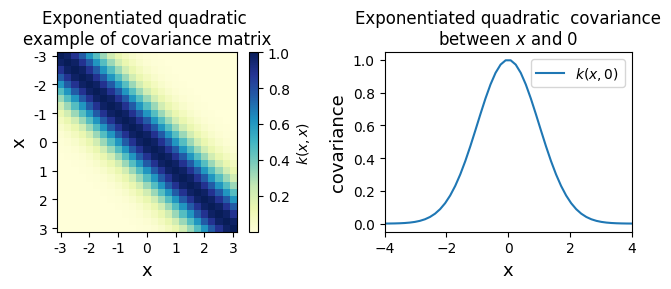

In [70]:
# Illustrate covariance matrix and function
# Show covariance matrix example from exponentiated quadratic
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7, 3))
xlim = (-3, 3)
X = np.expand_dims(np.linspace(*xlim, 25), 1)
Σ = GpKernels(X, X).gausskernel()
# Plot covariance matrix
im = ax1.imshow(Σ, cmap=cm.YlGnBu)
cbar = plt.colorbar(
    im, ax=ax1, fraction=0.045, pad=0.05)
cbar.ax.set_ylabel('$k(x,x)$', fontsize=10)
ax1.set_title((
    'Exponentiated quadratic \n'
    'example of covariance matrix'))
ax1.set_xlabel('x', fontsize=13)
ax1.set_ylabel('x', fontsize=13)
ticks = list(range(xlim[0], xlim[1]+1))
ax1.set_xticks(np.linspace(0, len(X)-1, len(ticks)))
ax1.set_yticks(np.linspace(0, len(X)-1, len(ticks)))
ax1.set_xticklabels(ticks)
ax1.set_yticklabels(ticks)
ax1.grid(False)

# Show covariance with X=0
xlim = (-4, 4)
X = np.expand_dims(np.linspace(*xlim, num=50), 1)
zero = np.array([[0]])
Σ0 = GpKernels(X, zero).gausskernel()
# Make the plots
ax2.plot(X[:,0], Σ0[:,0], label='$k(x,0)$')
ax2.set_xlabel('x', fontsize=13)
ax2.set_ylabel('covariance', fontsize=13)
ax2.set_title((
    'Exponentiated quadratic  covariance\n'
    'between $x$ and $0$'))
# ax2.set_ylim([0, 1.1])
ax2.set_xlim(*xlim)
ax2.legend(loc=1)

fig.tight_layout()
plt.show()

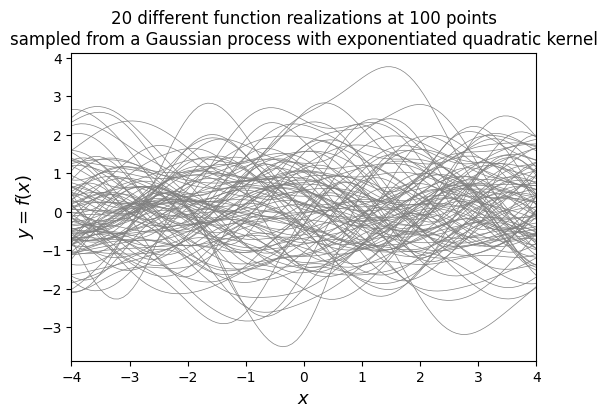

In [71]:
# Sample from the Gaussian process distribution (Prior)
nb_of_samples = 100  # Number of points in each function
number_of_functions = 100  # Number of functions to sample
# Independent variable samples
X = np.expand_dims(np.linspace(-4, 4, nb_of_samples), 1)
Σ = GpKernels(X, X).gausskernel()  # Kernel of data points

# Draw samples from the prior at our data points.
# Assume a mean of 0 for simplicity
ys = GaussianProcess(np.zeros(nb_of_samples), Σ).gpprior(number_of_functions)

# Plot the sampled functions
plt.figure(figsize=(6, 4))
for i in range(number_of_functions):
    plt.plot(X, ys[i], color = 'gray', linestyle='-', linewidth=0.5)
plt.xlabel('$x$', fontsize=13)
plt.ylabel('$y = f(x)$', fontsize=13)
plt.title((
    '20 different function realizations at 100 points\n'
    'sampled from a Gaussian process with exponentiated quadratic kernel'))
plt.xlim([-4, 4])
plt.show()

In [72]:
# Compute the posterior mean and covariance
# Define the true function that we want to regress on
f_cos = lambda x: (np.cos(x)).flatten()

n1 = 8  # Number of points to condition on (training points)
n2 = 100  # Number of points in posterior (test points)
ny = 100  # Number of functions that will be sampled from the posterior
domain = (-6, 6)

# Sample observations (X1, y1) on the function
X1 = np.random.uniform(domain[0]+2, domain[1]-2, size=(n1, 1))
y1 = f_cos(X1)
# Predict points at uniform spacing to capture function
X2 = np.linspace(domain[0], domain[1], n2).reshape(-1, 1)
# Compute posterior mean and covariance
μ2, Σ2 = GaussianProcess().gpposterior(X1, y1, X2, GpKernels, 0, n1)
# Compute the standard deviation at the test points to be plotted
σ2 = np.sqrt(np.diag(Σ2))

# Draw some samples of the posterior
y2 = np.random.multivariate_normal(mean=μ2, cov=Σ2, size=ny)

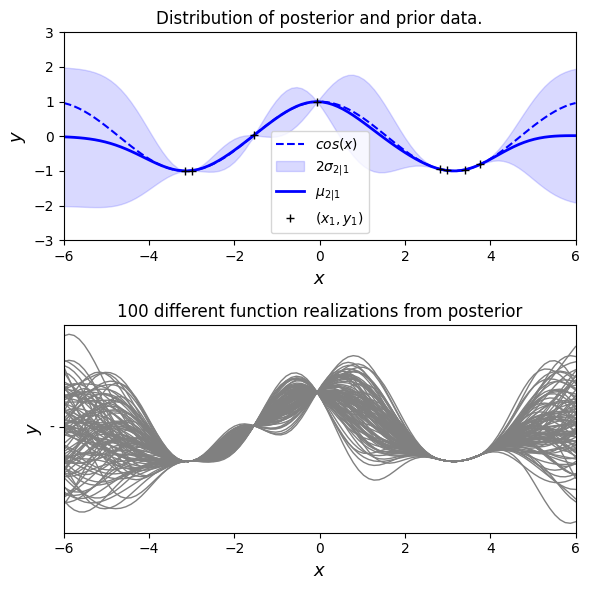

In [74]:
# Plot the postior distribution and some samples
fig, (ax1, ax2) = plt.subplots(
    nrows=2, ncols=1, figsize=(6, 6))
# Plot the distribution of the function (mean, covariance)
ax1.plot(X2, f_cos(X2), 'b--', label='$cos(x)$')
ax1.fill_between(X2.flat, μ2-2*σ2, μ2+2*σ2, color='blue', 
                 alpha=0.15, label='$2 \sigma_{2|1}$')
ax1.plot(X2, μ2, 'b-', lw=2, label='$\mu_{2|1}$')
ax1.plot(X1, y1, 'k+', linewidth=2, label='$(x_1, y_1)$')
ax1.set_xlabel('$x$', fontsize=13)
ax1.set_ylabel('$y$', fontsize=13)
ax1.set_title('Distribution of posterior and prior data.')
ax1.axis([domain[0], domain[1], -3, 3])
ax1.legend()
# Plot some samples from this function
ax2.plot(X2, y2.T, 'gray', '-', linewidth=1)
ax2.set_xlabel('$x$', fontsize=13)
ax2.set_ylabel('$y$', fontsize=13)
ax2.set_title('100 different function realizations from posterior')
ax1.axis([domain[0], domain[1], -3, 3])
ax2.set_xlim([-6, 6])
plt.tight_layout()
plt.show()
#


### 2.2. Acquisition Function

Proposing sampling points in the search space is done by acquisition functions. They trade off exploitation and exploration. Exploitation means sampling where the surrogate model predicts a high objective and exploration means sampling at locations where the prediction uncertainty is high. Both correspond to high acquisition function values and the goal is to maximize the acquisition function to determine the next sampling point. There are two famous approaches to implement the acquisition function named “probability of improvement (PI)” and 

## 3.	Implementing the Bayesian Optimization from scratch

Now it is the time to put all components together, here, step by step, the Bayesian optimization is implemented using a simple function.

## 4.	Libraries to Perform Bayesian Optimization